In [1]:
import pandas as pd
import numpy as np
import time                     #python 自带
from astropy.time import Time   #astropy 
from astropy import units as u  
from astropy import constants as const #import constants
from astropy.coordinates import SkyCoord
from astropy.coordinates import ICRS
from astropy.coordinates import Angle
import ligo.skymap.plot

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from moviepy.video.io.bindings import mplfig_to_npimage#动图生成
import moviepy.editor as mpy

In [2]:
orbitDataTAIJI  =  pd.read_csv('orbitDataTAIJI.dat', index_col = 0)  #读取csv文件
orbitData      =  orbitDataTAIJI.loc[0:366,:]

#distance in unit AU  (u.AU)
#velocity in unit km/s

sunPX = orbitData['sunPX']  
sunPY = orbitData['sunPY']
sunPZ = orbitData['sunPZ']

earthPX = orbitData['earthPX']
earthPY = orbitData['earthPY']
earthPZ = orbitData['earthPZ']

scp1X = orbitData['scp1X']
scp1Y = orbitData['scp1Y']
scp1Z = orbitData['scp1Z']

scp2X = orbitData['scp2X']
scp2Y = orbitData['scp2Y']
scp2Z = orbitData['scp2Z']

scp3X = orbitData['scp3X']
scp3Y = orbitData['scp3Y']
scp3Z = orbitData['scp3Z']


scpX = (scp1X + scp2X + scp3X) / 3  
scpY = (scp1Y + scp2Y + scp3Y) / 3  
scpZ = (scp1Z + scp2Z + scp3Z) / 3  

In [3]:
CE = SkyCoord(x=earthPX, y=earthPY, z=earthPZ, unit='AU', representation_type='cartesian',  frame='icrs')
CS = SkyCoord(x=sunPX, y=sunPY, z=sunPZ, unit='AU', representation_type='cartesian',  frame='icrs')
Csc1 = SkyCoord(x=scp1X, y=scp1Y, z=scp1Z, unit='AU', representation_type='cartesian',  frame='icrs')
Csc2 = SkyCoord(x=scp2X, y=scp2Y, z=scp2Z, unit='AU', representation_type='cartesian',  frame='icrs')
Csc3 = SkyCoord(x=scp3X, y=scp3Y, z=scp3Z, unit='AU', representation_type='cartesian',  frame='icrs')

Csc = SkyCoord(x=scpX, y=scpY, z=scpZ, unit='AU', representation_type='cartesian',  frame='icrs') #质心


CE.representation_type = 'spherical'
CS.representation_type = 'spherical'
Csc1.representation_type = 'spherical'
Csc2.representation_type = 'spherical'
Csc3.representation_type = 'spherical'
Csc.representation_type = 'spherical'

In [16]:
#银河系坐标或 
Ra_G   =  Angle('17h45m40.04s').to("radian").value
Decl_G =  Angle('-29d00m28.1s').to("radian").value

Ra_G   =  Angle('0h0m0s').to("radian").value
Decl_G =  Angle('89d59m59s').to("radian").value
C_G = SkyCoord(Ra_G , Decl_G, unit="radian", frame = 'icrs')  # defaults to ICRS frame

target = C_G 


Csc1frames = Csc1.skyoffset_frame()   #每一点的参考框架
Cscframes = Csc.skyoffset_frame()   #每一点的参考框架
Earthframes = CE.skyoffset_frame() 



targetDec1 = target.transform_to(Csc1frames)
targetDec = target.transform_to(Cscframes)

SunDec1 = CS.transform_to(Csc1frames)
SunDec = CS.transform_to(Cscframes)

EarthDec1 = CE.transform_to(Csc1frames)
EarthDec = CE.transform_to(Cscframes)

SunEarth = CS.transform_to(Earthframes)

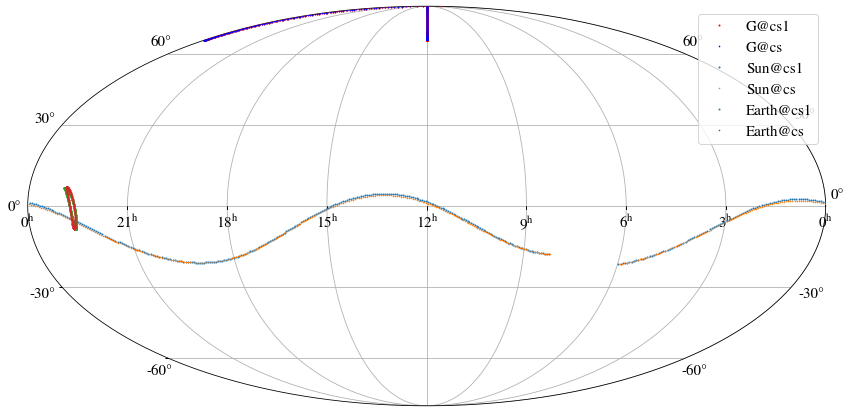

In [17]:
#coordinates(lon, lat)
framename = 'icrs'

targetDecUnit1 = SkyCoord(targetDec1.lon ,targetDec.lat, unit="deg", frame = framename)  # defaults to ICRS frame
targetDecUnit = SkyCoord(targetDec.lon ,targetDec.lat, unit="deg", frame = framename)  # defaults to ICRS frame

SunDecUnit1 = SkyCoord(SunDec1.lon ,SunDec1.lat, unit="deg", frame = framename)  # defaults to ICRS frame
SunDecUnit = SkyCoord(SunDec.lon ,SunDec.lat, unit="deg", frame = framename)  # defaults to ICRS frame


EarthDecUnit1 = SkyCoord(EarthDec1.lon, EarthDec1.lat, unit="deg", frame = framename)  # defaults to ICRS frame
EarthDecUnit = SkyCoord(EarthDec.lon, EarthDec.lat, unit="deg", frame = framename)  # defaults to ICRS frame

matplotlib.rcParams.update({'font.size': 15, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
# 绘图


fig = plt.figure(figsize=(12,6))
ax = plt.axes(projection='astro hours mollweide')

ax.plot_coord(targetDecUnit1 ,'o',c='red',markersize=1, label = 'G@cs1')
ax.plot_coord(targetDecUnit ,'x',c='blue',markersize=1, label = 'G@cs')

ax.plot_coord(SunDecUnit1,'o',markersize=1, label = 'Sun@cs1')
ax.plot_coord(SunDecUnit,'x',markersize=1, label = 'Sun@cs')

ax.plot_coord(EarthDecUnit1,'o',markersize=1, label = 'Earth@cs1')
ax.plot_coord(EarthDecUnit,'x',markersize=1, label = 'Earth@cs')

ax.grid(ax)
plt.legend()
plt.tight_layout()
plt.show()

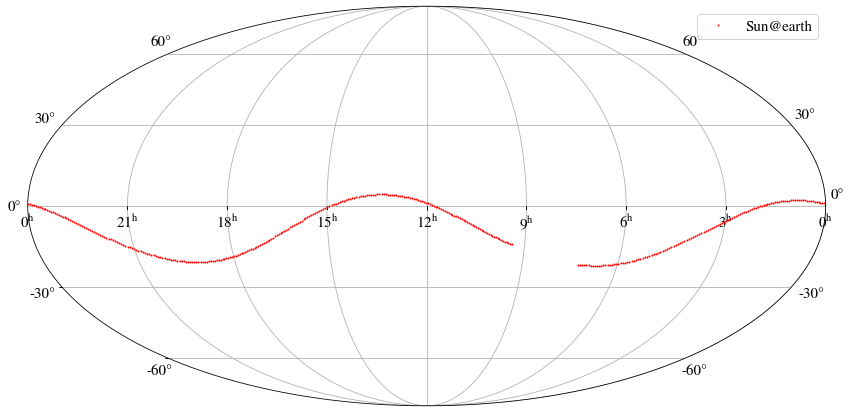

In [13]:
#coordinates(lon, lat)
framename = 'icrs'

SunEarthUnit = SkyCoord(SunEarth.lon, SunEarth.lat, unit="deg", frame = framename)

matplotlib.rcParams.update({'font.size': 15, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
# 绘图


fig = plt.figure(figsize=(12,6))
ax = plt.axes(projection='astro hours mollweide')

ax.plot_coord(SunEarthUnit ,'o',c='red',markersize=1, label = 'Sun@earth')

ax.grid(ax)
plt.legend()
plt.tight_layout()
plt.show()

t:   0%|          | 0/300 [00:00<?, ?it/s, now=None]

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


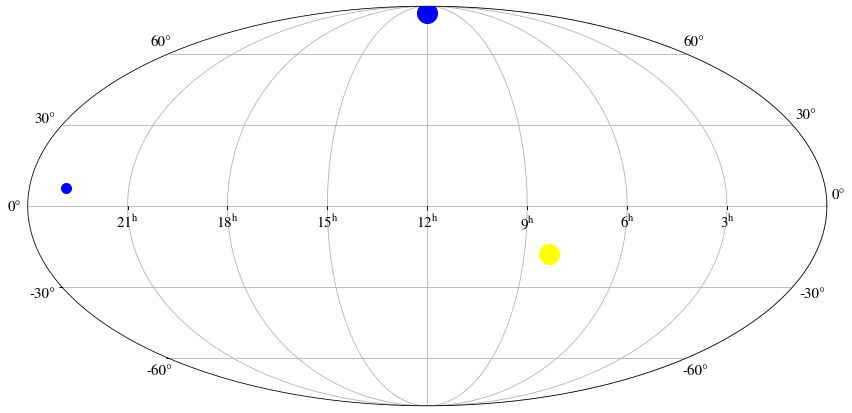

In [18]:
# #绘动图3d2#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
matplotlib.rcParams.update({'font.size': 15, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
# 绘图

duration = 10 #总共的时间       figsize代表横纵比
speed = 1.0#播放速率    
number = len(EarthDecUnit)

# plt.style.use('dark_background')


fig_mpl = plt.figure(figsize=(12,6))

# 使用MOVIEPY让图动起来(根据时间t来更新图). 保存为GIF.
def make_frame_mpl(t):
    tNorm = t/duration      #0 --> 1
    index = int(number*(t/duration))  #0 --> number
  
    ax = fig_mpl.add_subplot(111, projection='astro hours mollweide')
    ax.remove() #ax.clear不管用,会将整个ax框架清除，而不是只把图像清除
    ax = fig_mpl.add_subplot(111, projection='astro hours mollweide')

    #sun
    ax.plot_coord(SunDecUnit[index],'o',c='yellow',markersize=20)
#     ax.plot_coord(SunDecUnit[0:(index + 1)],c='yellow')
    #earth
    ax.plot_coord(EarthDecUnit[index],'o',c='blue',markersize=10)   
    #galaxy
    ax.plot_coord(targetDecUnit[index],'o',c='blue',markersize=20)   
 

    ax.grid(ax)
    plt.tight_layout()
    return mplfig_to_npimage(fig_mpl) # RGB image of the figure

animation =mpy.VideoClip(make_frame_mpl, duration=duration)
# animation.speedx(speed).write_videofile("taiji_orbit.mp4", fps=30) #输出mp4, speedx表示播放速度(1.0为正常速度), fps每秒帧数
#animation.speedx(speed).write_gif("TAIJI&LISA.gif", fps=30) #输出mp4, speedx表示播放速度(1.0为正常速度), fps每秒帧数
animation.speedx(speed).ipython_display(fps=30, loop=1, autoplay=0)